In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({
    'Gender':['Male','Female','Male','Female','Male','Female','Male'],
    'Age':[20,30,25,35,18,28,33]
})
df

,Gender,Age
0,Male,20
1,Female,30
2,Male,25
3,Female,35
4,Male,18
5,Female,28
6,Male,33


In [3]:
#P(A and B)

p_a_and_b= len(df[(df['Gender']=='Female') & (df['Age']>30)])/len(df)

# P(B)
p_b= len(df[df['Gender']=='Female'])/len(df)

# P(A|B)
p_a_given_b= p_a_and_b/p_b
print(p_a_given_b)

0.3333333333333333


In [4]:
# Group the DataFrame by gender
grouped_df = df.groupby('Gender')

#Count the number of people in each group who are over 30
over_30_count =grouped_df['Age'].apply(lambda x:(x>30).sum())

#Count the total number of people
total_count = grouped_df['Age'].count()

#Calculate the conditional probability for each group
conditional_probabilities = over_30_count/total_count
conditional_probabilities


Gender
Female    0.333333
Male      0.250000
Name: Age, dtype: float64

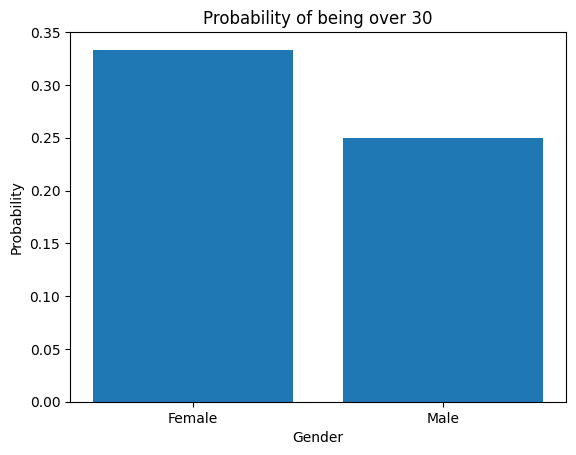

In [5]:
#Create a bar chart
plt.bar(conditional_probabilities.index, conditional_probabilities)
plt.xlabel('Gender')
plt.ylabel('Probability')
plt.title('Probability of being over 30')
plt.show()

### EXERCISE: FIND P(B|A) 

In [6]:
#P(A and B)

p_a_and_b= len(df[(df['Age']>30) & (df['Gender']=='Female')])/len(df)

# P(A)
p_a= len(df[df['Age']>30])/len(df)

# P(B|A)
p_b_given_a= p_a_and_b/p_a
print(p_b_given_a)

0.5


## Conditional Probability

In [7]:
from numpy import random

In [8]:
random.seed(0)
#Dictionary is to strore total number of people in each age group
totals ={20:0,30:0,40:0,50:0,60:0,70:0}
# Dictionary to store purchases made by people in each group
purchases = {20:0,30:0,40:0,50:0,60:0,70:0}
totalpurchases = 0

In [9]:
for _ in range(100000):
    ageDecade = random.choice([20,30,40,50,60,70])#select one of these
    purchaseProbability = float(ageDecade)/100.0 #lesser the age lesser the probability
    totals[ageDecade] +=1
    
    if(random.random()< purchaseProbability):
        totalpurchases+=1
        purchases[ageDecade]+=1
print(totals)
print(purchases)
print(totalpurchases)

{20: 16576, 30: 16619, 40: 16632, 50: 16805, 60: 16664, 70: 16704}
{20: 3392, 30: 4974, 40: 6670, 50: 8319, 60: 9944, 70: 11713}
45012


In [10]:
"""
Conditional Probability
First lets compute P(E|F), where E is the "purchase" and F is the "you are in your 30s". The probability of
someone in their 30s buying something is just the percentage of how many 30 year olds bought something
"""

PEF = float(purchases[30])/float(totals[30])
print("P(Purchase|30s): "+ str(PEF))

# P(F) is just the probability of being in 30s
PF = float(totals[30])/100000.0
print("P(30s): "+ str(PF))

# P(E) is just the oveall probability of buying something regardless of age
PE = float(totalpurchases)/100000.0
print("P(Purchase): "+ str(PE))

#P(F|E)
print("P(30s|Purchase): "+ str(float(purchases[30])/100000.0))

# product of P(E) and P(F): P(E)P(F)
print("P(Purchase)P(30s): "+ str(PE*PF))

P(Purchase|30s): 0.29929598652145134
P(30s): 0.16619
P(Purchase): 0.45012
P(30s|Purchase): 0.04974
P(Purchase)P(30s): 0.07480544280000001


## EXERCISE:
Modify the code above such that the purchase probability does not vary with age, making E and F independent.
Then, confirm the P(E|F) is same as P(E), showing that the conditional probability of purchase for a given age is
not any different than the probability of purchase regardless of age


In [18]:
for _ in range(100000):
    ageDecade = random.choice([20,30,40,50,60,70])#select one of these
    purchaseProbability = float(ageDecade)/100.0 #lesser the age lesser the probability
    totals[ageDecade] +=1
    
    if(random.random()< 0.5):
        totalpurchases+=1
        purchases[ageDecade]+=1
print(totals)
print(purchases)
print(totalpurchases)

{20: 67056, 30: 66184, 40: 66683, 50: 66780, 60: 66887, 70: 66410}
{20: 37087, 30: 37990, 40: 40127, 50: 41492, 60: 43397, 70: 44909}
245002


In [19]:
PEF = float(purchases[30])/float(totals[30])
print("P(Purchase|30s): "+ str(PEF))

# P(F) is just the probability of being in 30s
PF = float(totals[30])/100000.0
print("P(30s): "+ str(PF))

# P(E) is just the oveall probability of buying something regardless of age
PE = float(totalpurchases)/100000.0
print("P(Purchase): "+ str(PE))

#P(F|E)
print("P(30s|Purchase): "+ str(float(purchases[30])/100000.0))

# product of P(E) and P(F): P(E)P(F)
print("P(Purchase)P(30s): "+ str(PE*PF))

P(Purchase|30s): 0.5740058020065273
P(30s): 0.66184
P(Purchase): 2.45002
P(30s|Purchase): 0.3799
P(Purchase)P(30s): 1.6215212367999998
